In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [18]:
df = pd.read_csv('C:\\Users\\Miswa Gandhi\\Desktop\\titanic.csv')

Step 1

In [19]:
df = df[['pclass', 'sex', 'age','sibsp','survived']]
df['pclass'] = df['pclass'].map({'1st': 1, '2nd':2, '3rd':3})
df['sex'] = df['sex'].map({'male':0, 'Female':1})
df['age'].fillna((df['age'].mean()),inplace=True)
df = df.dropna()
df.head(10)

,pclass,sex,age,sibsp,survived
1,1,0.0,0.916700,1,1
3,1,0.0,30.000000,1,0
5,1,0.0,48.000000,0,1
7,1,0.0,39.000000,0,0
9,1,0.0,71.000000,0,0
10,1,0.0,47.000000,1,0
14,1,0.0,80.000000,0,1
15,1,0.0,29.881135,0,0
16,1,0.0,24.000000,0,0
19,1,0.0,36.000000,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X= df.drop('survived', axis = 1)
Y= df['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


In [13]:
len(X_train)

674

In [14]:
len(X_test)

169

In [21]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pclass,169.0,2.414201,0.798085,1.0000,2.0,3.000000,3.0,3.0
sex,169.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
age,169.0,28.774700,11.765738,0.4167,22.0,29.881135,32.0,70.0
sibsp,169.0,0.461538,1.107335,0.0000,0.0,0.000000,1.0,8.0


Step:2

In [23]:
from sklearn.neural_network import MLPClassifier

In [38]:
classifier = MLPClassifier(hidden_layer_sizes = (2,),  activation="logistic",   solver="adam", alpha =1e-5, momentum = 0.3, 
learning_rate_init=0.1, verbose=True)
classifier = classifier.fit(X_train, Y_train)

Iteration 1, loss = 0.54207100
Iteration 2, loss = 0.48003945
Iteration 3, loss = 0.48652033
Iteration 4, loss = 0.49055789
Iteration 5, loss = 0.47869220
Iteration 6, loss = 0.47128859
Iteration 7, loss = 0.46652377
Iteration 8, loss = 0.46600940
Iteration 9, loss = 0.46280390
Iteration 10, loss = 0.46022420
Iteration 11, loss = 0.46039793
Iteration 12, loss = 0.45974427
Iteration 13, loss = 0.45679413
Iteration 14, loss = 0.45688614
Iteration 15, loss = 0.45693876
Iteration 16, loss = 0.45626720
Iteration 17, loss = 0.45714812
Iteration 18, loss = 0.45594968
Iteration 19, loss = 0.45518093
Iteration 20, loss = 0.45582849
Iteration 21, loss = 0.45540023
Iteration 22, loss = 0.45533238
Iteration 23, loss = 0.45566183
Iteration 24, loss = 0.45544188
Iteration 25, loss = 0.45453333
Iteration 26, loss = 0.45553891
Iteration 27, loss = 0.45495729
Iteration 28, loss = 0.45578908
Iteration 29, loss = 0.45571828
Iteration 30, loss = 0.45493692
Iteration 31, loss = 0.45478464
Iteration 32, los

In [71]:
Accuracy = classifier.score(X_train, Y_train)
print(Accuracy)

0.8308605341246291


In [70]:
from sklearn.metrics import accuracy_score, classification_report
Y_predict = classifier.predict(X_test)
score_test_ = accuracy_score(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))
score_test_

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       133
           1       0.89      0.22      0.36        36

    accuracy                           0.83       169
   macro avg       0.86      0.61      0.63       169
weighted avg       0.84      0.83      0.78       169



0.8284023668639053

In [42]:
from sklearn.metrics import confusion_matrix

In [55]:
predictions = classifier.predict(X_test)
print("confusion matrix:")
print(confusion_matrix(Y_test, predictions))


confusion matrix:
[[132   1]
 [ 28   8]]


In [ ]:
Step3

In [72]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test,y_pred)

TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
precision_test =TP/(TP+FN)
recall_test= TN/(FP+TN)
print("predicted (on testing set) : {0:.2f}%\n".format(precision_test*100))
print("predicted (on testing set) : {0:.2f}%\n".format(recall_test*100))

predicted (on testing set) : 22.22%

predicted (on testing set) : 99.25%



In [76]:
inSample_y = classifier.predict(X_train)
inSampleSurvivors = 1 - sum(inSample_y[Y_train == 1] ^ Y_train[Y_train == 1]) / len(X_train[Y_train == 1])
inSampleFatalities = 1 - sum(inSample_y[Y_train == 0] ^ Y_train[Y_train == 0]) / len(Y_train[Y_train == 0])

# out-of-samples percent survivors/fatalities correctly predicted (on training set)
outSample_y = classifier.predict(X_test)
outSampleSurvivors = 1 - sum(inSample_y[Y_train == 1] ^ Y_train[Y_train == 1]) / len(Y_train[Y_train == 1])
outSampleFatalities = 1 - sum(inSample_y[Y_train == 0] ^ Y_train[Y_train == 0]) / len(Y_train[Y_train == 0])

print("In sample percent survivors correctly predicted: {:.2f}%".format(inSampleSurvivors*100))
print("In sample percent fatalaties correctly predicted: {:.2f}%".format(inSampleFatalities*100))
print("Out sample percent survivors correctly predicted: {:.2f}%".format(outSampleSurvivors*100))
print("Out sample percent survivors correctly predicted: {:.2f}%".format(outSampleFatalities*100))

In sample percent survivors correctly predicted: 11.20%
In sample percent fatalaties correctly predicted: 99.45%
Out sample percent survivors correctly predicted: 11.20%
Out sample percent survivors correctly predicted: 99.45%


step 4: comparison

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 50,max_depth=5)
rfr.fit(X_train,Y_train)
predictY_RandomForest = rfr.predict(X_test)
score_test_RandomForestClassifier = accuracy_score(Y_test,predictY_RandomForest)
score_test_RandomForestClassifier
print(classification_report(Y_test,predictY_RandomForest))
from sklearn.metrics import f1_score
f1_score(Y_test,predictY_RandomForest)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       133
           1       0.90      0.25      0.39        36

    accuracy                           0.83       169
   macro avg       0.87      0.62      0.65       169
weighted avg       0.85      0.83      0.79       169



0.391304347826087

In [94]:
accuracy = [0.68,0.70]
classifier = ['out-of-sample' , 'RandomForest']

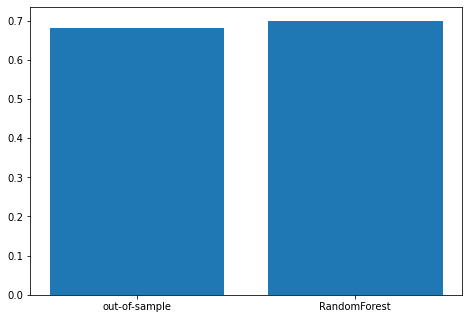

In [96]:
fig = plt.figure()

axis = fig.add_axes([0,0,1,1])
axis.bar(classifier , accuracy)
plt.show()

By this bar graph we can see that Random forest has more accuracy compare to out of sample accuracy